# Linear Regression

Dataset: https://www.kaggle.com/vikrishnan/boston-house-prices/data

References: https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

References: http://benalexkeen.com/linear-regression-in-python-using-scikit-learn/

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#read csv
cols = ['CRIM', "ZN", "INDUS", "CHAS", "NOX", "RM" , "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
df = pd.read_csv('./data/housing.csv', names=cols, header=None)
(df.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
df.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
MEDV       54
dtype: int64

In [4]:
df = df.dropna()
df.shape

(452, 14)

In [5]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.281239,0.573822,0.050066,0.636941,-0.142458,0.447664,-0.461967,0.897988,0.825668,0.319470,-0.413014,0.424789,-0.286245
ZN,-0.281239,1.000000,-0.514273,-0.059697,-0.500729,0.306623,-0.555679,0.656152,-0.266606,-0.269446,-0.364122,0.150380,-0.411165,0.331570
INDUS,0.573822,-0.514273,1.000000,0.103016,0.738517,-0.364895,0.605982,-0.669362,0.513306,0.673312,0.317336,-0.316752,0.565402,-0.411915
CHAS,0.050066,-0.059697,0.103016,1.000000,0.134064,0.076580,0.123141,-0.140662,0.057337,0.016894,-0.099623,0.013415,-0.009430,0.154409
NOX,0.636941,-0.500729,0.738517,0.134064,1.000000,-0.264594,0.707148,-0.745812,0.542499,0.615120,0.103464,-0.358433,0.536824,-0.332778
RM,-0.142458,0.306623,-0.364895,0.076580,-0.264594,1.000000,-0.187871,0.138774,-0.095931,-0.214948,-0.334164,0.108352,-0.607289,0.740181
AGE,0.447664,-0.555679,0.605982,0.123141,0.707148,-0.187871,1.000000,-0.720334,0.359326,0.427095,0.192956,-0.223765,0.573266,-0.299893
DIS,-0.461967,0.656152,-0.669362,-0.140662,-0.745812,0.138774,-0.720334,1.000000,-0.388385,-0.444131,-0.152253,0.234449,-0.423725,0.138798
RAD,0.897988,-0.266606,0.513306,0.057337,0.542499,-0.095931,0.359326,-0.388385,1.000000,0.872876,0.387484,-0.352586,0.309788,-0.217902
TAX,0.825668,-0.269446,0.673312,0.016894,0.615120,-0.214948,0.427095,-0.444131,0.872876,1.000000,0.384511,-0.367084,0.410927,-0.345898


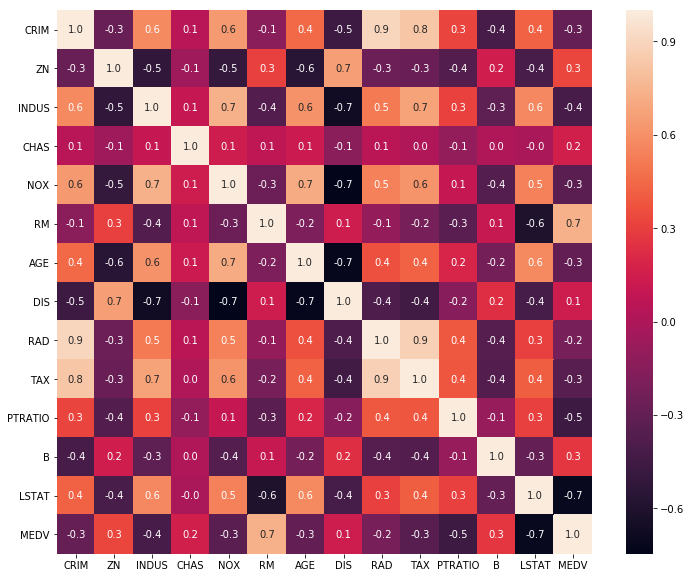

In [6]:
import seaborn as sb
plt.figure(figsize=(12, 10))
sb.heatmap(df.corr(), annot=True, fmt='.1f')

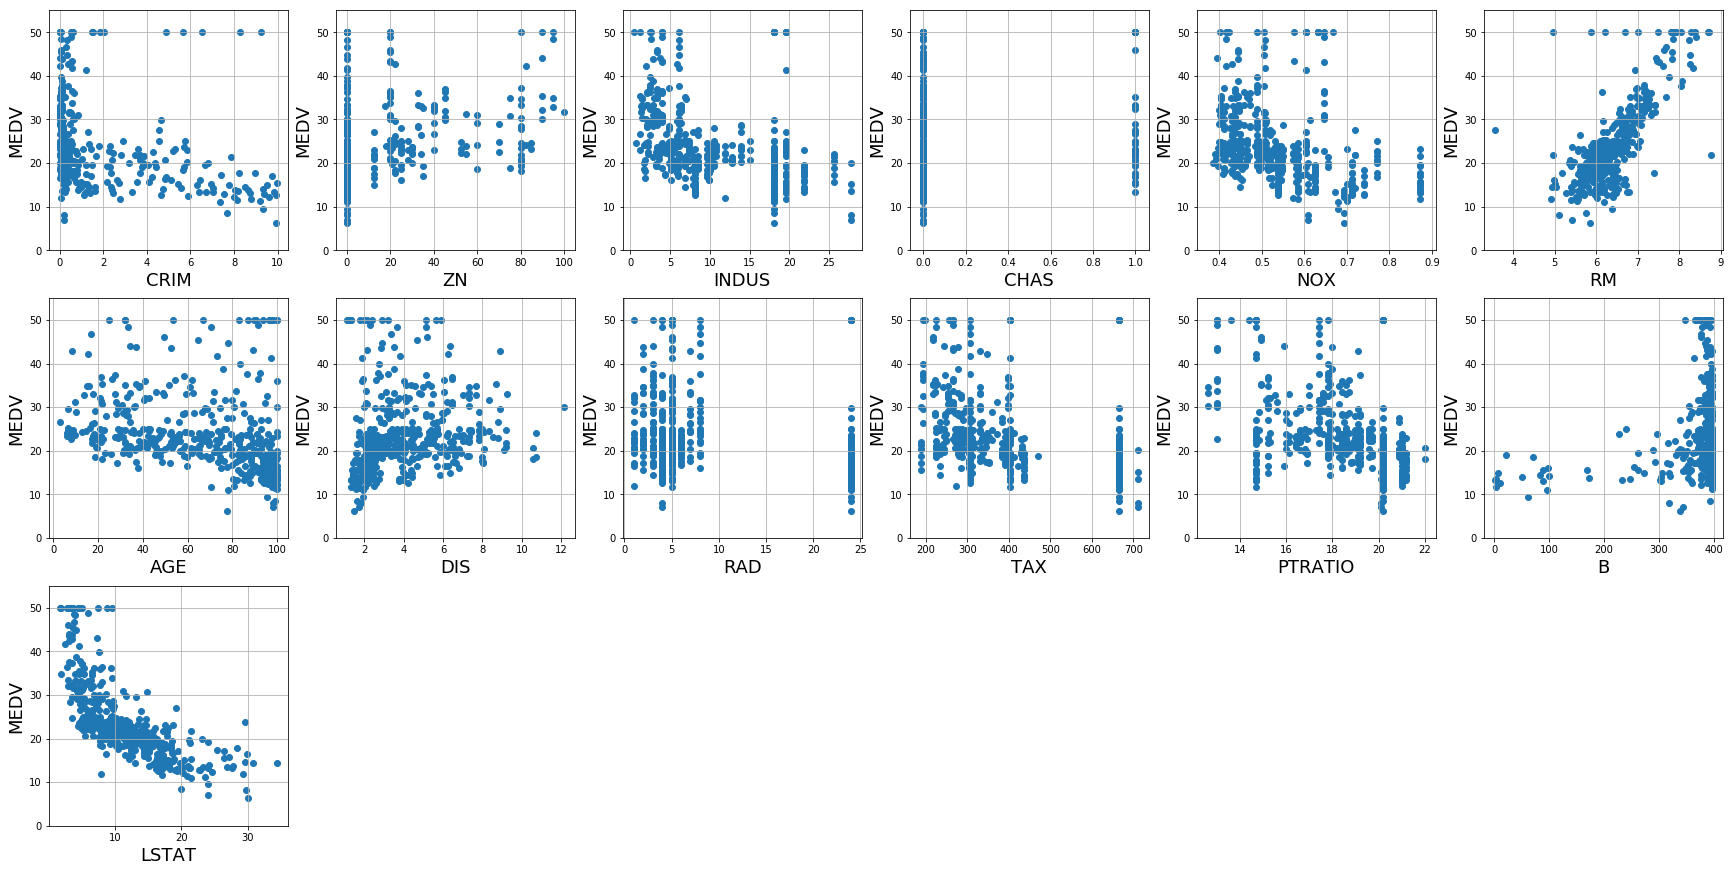

In [7]:
plt.figure(figsize=(30, 15))

for i in range(1, 14):
    plt.subplot(3, 6, i)
    plt.scatter(df[cols[i-1]], df['MEDV'])
    plt.xlabel(cols[i-1], fontsize=18)
    plt.ylabel("MEDV", fontsize=18)
    plt.grid()
    plt.ylim([0, df['MEDV'].max()+5])
plt.show()

### Implementing Linear Regression

In [28]:
lm = LinearRegression()

cols_to_consider = ['INDUS','NOX', 'RM', 'AGE', 'DIS','PTRATIO','LSTAT']

#data set distribution
X = df[cols_to_consider]
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [29]:
#get the fitting curve
lm_model = lm.fit(X_train, y_train)

In [30]:
obtained_y_test = lm.predict(X_test)

In [31]:
lm_model.coef_

array([ -0.03530351, -10.65109298,   4.7751232 ,   0.02421777,
        -0.96831659,  -0.89891329,  -0.72464921])

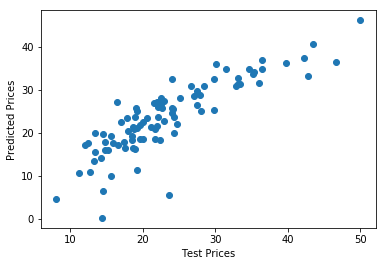

In [32]:
#scatter plot of obtained_y_test with y_test
plt.scatter(y_test, obtained_y_test)
plt.xlabel("Test Prices")
plt.ylabel("Predicted Prices")
plt.show()

In [33]:
#mean square error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_true = y_test, y_pred = obtained_y_test)
print("MSE = %f" % mse)

MSE = 20.853934


In [34]:
lm.score(X_test, y_test)

0.712086200952422

In [35]:
#the more folds we have, we will be reducing the error due the bias but increasing the error due to variance
from sklearn.model_selection import cross_val_score
from sklearn import metrics

scores = cross_val_score(LinearRegression(), X, y, cv=10)
print("Cross-validated scores:", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross-validated scores: [ 0.77348492  0.17982956  0.71119157  0.76119439  0.60258385  0.80562481
  0.76900021  0.23868801 -0.27654865  0.3507573 ]
Accuracy: 0.49 (+/- 0.68)
